In [2]:
score = read.csv('../data/score.csv', header=T)
head(score)

,id,gender,midterm,final
,<int>,<chr>,<int>,<int>
1,13001,f,60,80
2,13003,m,90,72
3,13013,m,76,85
4,13020,f,74,89
5,13041,f,50,53
6,13065,m,86,64


In [2]:
head(score, 3)

,id,gender,midterm,final
,<int>,<chr>,<int>,<int>
1,13001,f,60,80
2,13003,m,90,72
3,13013,m,76,85


In [3]:
dim(score)

[1] 89  4

In [4]:
score$total = score$midterm + score$final

In [6]:
sapply(score[,-c(1:2)],mean, na.rm=T)

midterm     final     total 
 66.89888  55.75281 122.65169

In [8]:
sapply(score[,-c(1:2)], sd, na.rm=T)

midterm    final    total 
19.06034 24.08804 37.88232

In [9]:
summary(score[,-1])

    gender             midterm          final           total      
 Length:89          Min.   : 22.0   Min.   : 0.00   Min.   : 35.0  
 Class :character   1st Qu.: 52.0   1st Qu.:40.00   1st Qu.: 99.0  
 Mode  :character   Median : 71.0   Median :55.00   Median :128.0  
                    Mean   : 66.9   Mean   :55.75   Mean   :122.7  
                    3rd Qu.: 82.0   3rd Qu.:75.00   3rd Qu.:154.0  
                    Max.   :100.0   Max.   :93.00   Max.   :193.0  

In [10]:
class(score$gender)

[1] "character"

In [11]:
class(score$midterm)

[1] "integer"

In [12]:
fivenum(score$total)

[1]  35  99 128 154 193

In [14]:
library(psych)

In [15]:
describe(score[,-c(1:2)])

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
midterm,1,89,66.89888,19.06034,71,67.84932,19.2738,22,100,78,-0.3968489,-0.6559548,2.020392
final,2,89,55.75281,24.08804,55,57.45205,25.2042,0,93,93,-0.5054800,-0.5121913,2.553327
total,3,89,122.65169,37.88232,128,124.76712,40.0302,35,193,158,-0.4486563,-0.6932943,4.015518


In [16]:
describe(score)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
id,1,89,66186.325843,14374.604484,70028,70027.164384,23.7216,13001,70060,57059,-3.3924557,9.6172145,1.523705e+03
gender*,2,89,1.606742,0.491241,2,1.630137,0.0000,1,2,1,-0.4296964,-1.8356085,5.207144e-02
midterm,3,89,66.898876,19.060338,71,67.849315,19.2738,22,100,78,-0.3968489,-0.6559548,2.020392e+00
final,4,89,55.752809,24.088040,55,57.452055,25.2042,0,93,93,-0.5054800,-0.5121913,2.553327e+00
total,5,89,122.651685,37.882324,128,124.767123,40.0302,35,193,158,-0.4486563,-0.6932943,4.015518e+00


In [17]:
Dscore = describe(score[,-c(1:2)])

In [18]:
names(Dscore)

[1] "vars"     "n"        "mean"     "sd"       "median"   "trimmed" 
 [7] "mad"      "min"      "max"      "range"    "skew"     "kurtosis"
[13] "se"

In [19]:
# 2그룹별 기술통계

In [20]:
head(score, 3)

,id,gender,midterm,final,total
,<int>,<chr>,<int>,<int>,<int>
1,13001,f,60,80,140
2,13003,m,90,72,162
3,13013,m,76,85,161


In [29]:
m <- tapply(score$total, score$gender, mean)
m

f        m 
122.7714 122.5741

In [30]:
s <- tapply(score$total, score$gender, sd)
s

f       m 
34.2955 40.3511

In [31]:
l <- tapply(score$total, score$gender, length)
l

f  m 
35 54

In [28]:
cbind(mean=m,stdev=s,n=l)

,mean,stdev,n
f,122.7714,34.2955,35
m,122.5741,40.3511,54


In [32]:
# 2.2 aggregate 함수 이용

In [33]:
aggregate(score[c('midterm','final','total')], list(gender=score$gender), mean)

gender,midterm,final,total
<chr>,<dbl>,<dbl>,<dbl>
f,65.57143,57.20000,122.7714
m,67.75926,54.81481,122.5741


In [35]:
aggregate(score[c('midterm','final','total')], list(gender=score$gender), sd)

gender,midterm,final,total
<chr>,<dbl>,<dbl>,<dbl>
f,16.37122,21.99305,34.2955
m,20.72091,25.51143,40.3511


In [36]:
aggregate(score[c('midterm','final','total')], list(gender=score$gender), length)

gender,midterm,final,total
<chr>,<int>,<int>,<int>
f,35,35,35
m,54,54,54


In [37]:
# 2.3 by 함수 이용

In [38]:
by(score[,3:5], score$gender, summary)

score$gender: f
    midterm           final          total      
 Min.   : 33.00   Min.   : 0.0   Min.   : 35.0  
 1st Qu.: 52.50   1st Qu.:44.5   1st Qu.:102.5  
 Median : 64.00   Median :55.0   Median :122.0  
 Mean   : 65.57   Mean   :57.2   Mean   :122.8  
 3rd Qu.: 76.50   3rd Qu.:76.5   3rd Qu.:152.0  
 Max.   :100.00   Max.   :89.0   Max.   :172.0  
------------------------------------------------------------ 
score$gender: m
    midterm           final           total      
 Min.   : 22.00   Min.   : 0.00   Min.   : 36.0  
 1st Qu.: 50.50   1st Qu.:38.00   1st Qu.: 91.5  
 Median : 72.00   Median :56.00   Median :133.0  
 Mean   : 67.76   Mean   :54.81   Mean   :122.6  
 3rd Qu.: 82.75   3rd Qu.:74.75   3rd Qu.:156.5  
 Max.   :100.00   Max.   :93.00   Max.   :193.0  

In [39]:
# 2.4 psych::describeBy 함수 이용

In [40]:
library(psych)

In [41]:
describeBy(score[,3:5], score$gender)


 Descriptive statistics by group 
group: f
        vars  n   mean    sd median trimmed   mad min max range  skew kurtosis
midterm    1 35  65.57 16.37     64   65.69 17.79  33 100    67  0.05    -0.76
final      2 35  57.20 21.99     55   58.83 23.72   0  89    89 -0.60    -0.06
total      3 35 122.77 34.30    122  125.24 38.55  35 172   137 -0.56    -0.47
          se
midterm 2.77
final   3.72
total   5.80
------------------------------------------------------------ 
group: m
        vars  n   mean    sd median trimmed   mad min max range  skew kurtosis
midterm    1 54  67.76 20.72     72   69.09 19.27  22 100    78 -0.57    -0.72
final      2 54  54.81 25.51     56   56.39 27.43   0  93    93 -0.42    -0.82
total      3 54 122.57 40.35    133  124.50 42.25  36 193   157 -0.39    -0.90
          se
midterm 2.82
final   3.47
total   5.49

In [42]:
# 3. 줄기-잎 그림, 상자그림, 히스토그램

In [43]:
stem(score$final)


  The decimal point is 1 digit(s) to the right of the |

  0 | 004667
  1 | 39
  2 | 0116
  3 | 1335688889
  4 | 0044577889
  5 | 00111222344558
  6 | 023333445588
  7 | 0001224556778
  8 | 0001345667778999
  9 | 13



In [44]:
stem(score$total)


  The decimal point is 1 digit(s) to the right of the |

   2 | 56
   4 | 32569
   6 | 66602389
   8 | 04590789
  10 | 2335568811236689
  12 | 12278892444567
  14 | 0112266890222456778
  16 | 012334556778237
  18 | 93



In [45]:
stem(score$total, scale=2)


  The decimal point is 1 digit(s) to the right of the |

   3 | 56
   4 | 3
   5 | 2569
   6 | 666
   7 | 02389
   8 | 0459
   9 | 0789
  10 | 23355688
  11 | 11236689
  12 | 1227889
  13 | 2444567
  14 | 011226689
  15 | 0222456778
  16 | 012334556778
  17 | 237
  18 | 9
  19 | 3



In [8]:
library(aplpack)

In [5]:
maleScore = score$total[score$gender=='m']
maleScore

[1] 162 161 150 165 193 173 163 189 167 155 135 134 136  66 177 113 166 157 164
[20]  70 116 142  85  84  66 106 127  36  89 122  79 142 128 103 105  52 158 146
[39] 167  43 134  56  78 119 146  72  55 134 137 108 132 149 108  99

In [6]:
femaleScore = score$total[score$gender=='f']
femaleScore

[1] 140 163 103 122  66 157 165 172 111 152 148  73 154  97  90 118  98 105 102
[20] 160  35 112 129 152 116 121  80 141 128 168 152  59 141 111 156

In [9]:
stem.leaf.backback(maleScore, femaleScore)

____________________________________
  1 | 2: represents 12, leaf unit: 1 
      maleScore      femaleScore
____________________________________
   1          6|  3 |5          1   
   2          3|  4 |               
   5        652|  5 |9          2   
   7         66|  6 |6          3   
  11       9820|  7 |3          4   
  14        954|  8 |0          5   
  15          9|  9 |078        8   
  20      88653| 10 |235       11   
  23        963| 11 |11268     16   
  26        872| 12 |1289      (4)  
  (7)   7654442| 13 |               
  21      96622| 14 |0118      15   
  16       8750| 15 |222467    11   
  12   77654321| 16 |0358       5   
   4         73| 17 |2          1   
   2          9| 18 |               
   1          3| 19 |               
               | 20 |               
____________________________________
n:           54      35         
____________________________________


In [10]:
median(maleScore)

[1] 133

In [11]:
median(femaleScore)

[1] 122

In [12]:
# R 3.3 상자그림

In [13]:
par(mfrow=c(1, 2))

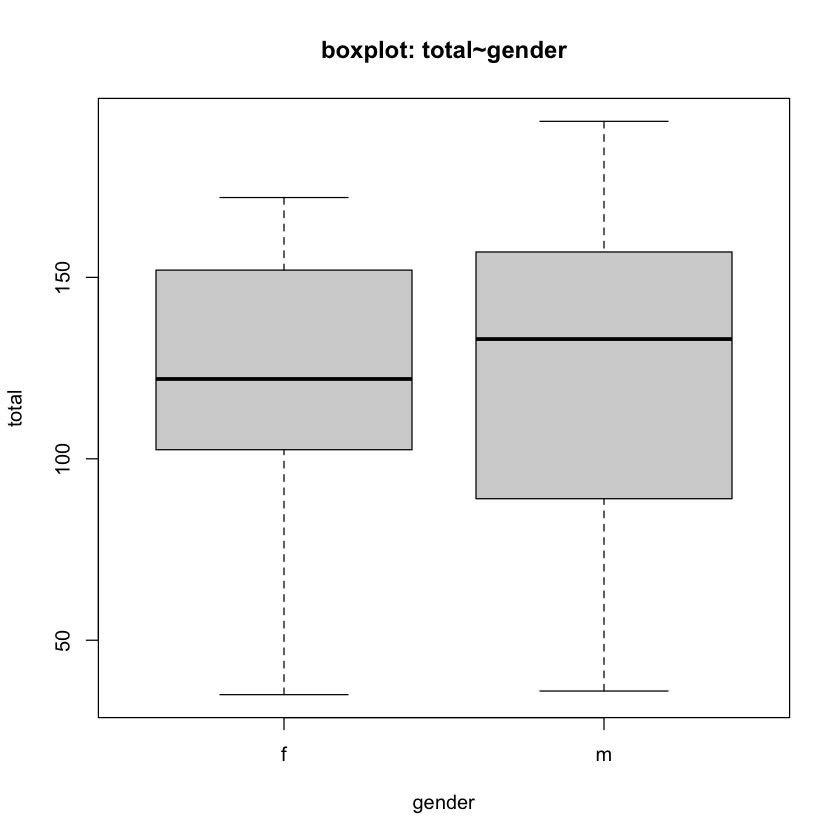

In [15]:
boxplot(total ~ gender, data=score)
title('boxplot: total~gender')

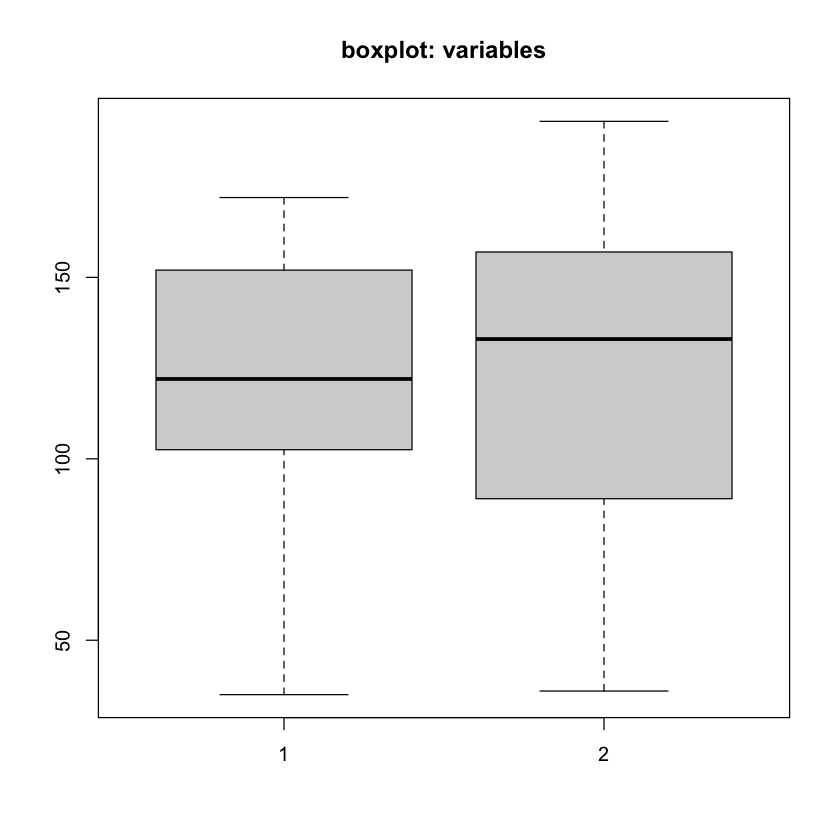

In [17]:
boxplot(femaleScore, maleScore)
title('boxplot: variables')

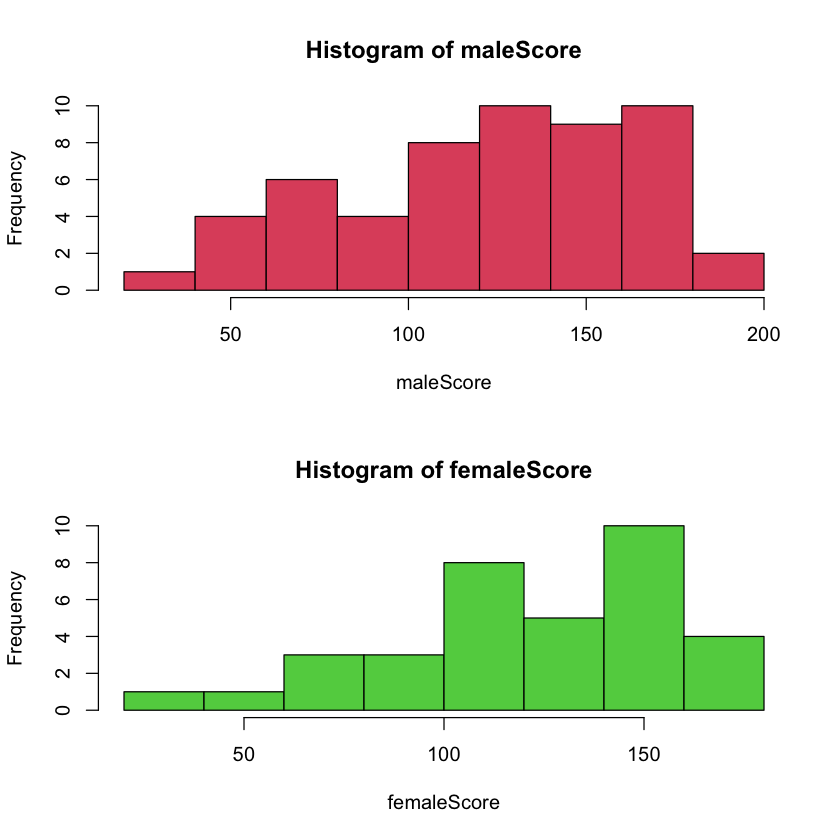

In [21]:
par(mfrow=c(2,1))
hist(maleScore, col=2)
hist(femaleScore, col=3)

In [1]:
# 4.1 빈도표 및 분할표

In [3]:
enqete <- read.csv('../data/enqete.csv', header=T)
head(enqete)

,college,grade,q1,q2
,<chr>,<int>,<int>,<int>
1,med,1,1,1
2,med,1,1,1
3,med,1,1,1
4,med,2,1,2
5,med,2,2,1
6,med,2,1,1


In [5]:
enqete$grade

[1] 1 1 1 2 2 2 2 3 3 3 4 4 4 4 1 1 1 1 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 4 4
 [38] 4 4 4 4 2 2 2 2 3 3 3 3 3 4 4 4 4 4 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 2
 [75] 2 2 2 2 2 2 3 3 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2
[112] 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4
[149] 4 4 4 4 4 4 4 4 4 4 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[223] 2 4 4 4 4 4 3 2 2 1 1 1 1 1 1 4 4 4 4 4 4 4 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2
[260] 4 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4
[297] 4 4 4 4 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 1 3 2 4 1 3 2 2 2
[334] 3 1 1 1 4 3 4 4 1 2 1 2 1 3 1 4 1 1 3 2 3 3 3 4 1 2 4 3 4 1 1 1 1 1 1 1 1
[371] 1 1 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4

In [7]:
table(enqete$grade)
# 빈도를 구한다


  1   2   3   4 
103 103 100  94 

In [9]:
grade.freq = table(enqete$grade)
names(grade.freq) = c('gr1','gr2','gr3','gr4')
grade.freq

gr1 gr2 gr3 gr4 
103 103 100  94 

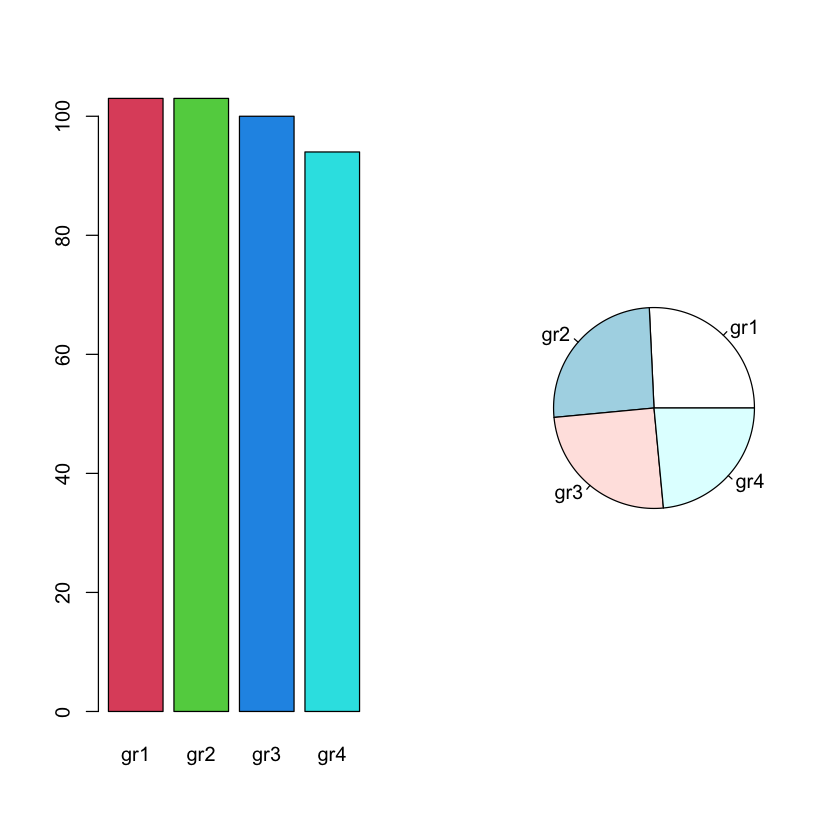

In [12]:
par(mfrow=c(1,2))
barplot(grade.freq, col=2:5)
pie(grade.freq)

In [13]:
# 분할표

In [15]:
table(enqete$grade, enqete$q1)

   
     0  1  2
  1  0 80 23
  2  0 66 37
  3  0 55 44
  4  1 55 38

In [17]:
enqete[enqete==0] = NA
enqete

college,grade,q1,q2
<chr>,<int>,<int>,<int>
med,1,1,1
med,1,1,1
med,1,1,1
med,2,1,2
med,2,2,1
med,2,1,1
med,2,1,2
med,3,1,2
med,3,1,1


In [19]:
enqete = na.omit(enqete)
enqete

,college,grade,q1,q2
,<chr>,<int>,<int>,<int>
1,med,1,1,1
2,med,1,1,1
3,med,1,1,1
4,med,2,1,2
5,med,2,2,1
6,med,2,1,1
7,med,2,1,2
8,med,3,1,2
9,med,3,1,1


In [20]:
table(enqete$grade, enqete$q1)

   
     1  2
  1 80 23
  2 66 37
  3 55 44
  4 55 38

In [22]:
college = table(enqete$grade, enqete$q1)
colnames(college) = c('ans1', 'ans2')
rownames(college) = c('grade1', 'grade2', 'grade3', 'grade4')
college

        
         ans1 ans2
  grade1   80   23
  grade2   66   37
  grade3   55   44
  grade4   55   38

In [23]:
names(dimnames(college)) = c('Grade','Answer')
college

        Answer
Grade    ans1 ans2
  grade1   80   23
  grade2   66   37
  grade3   55   44
  grade4   55   38

In [24]:
xtabs(~grade+q1, data=enqete)

     q1
grade  1  2
    1 80 23
    2 66 37
    3 55 44
    4 55 38

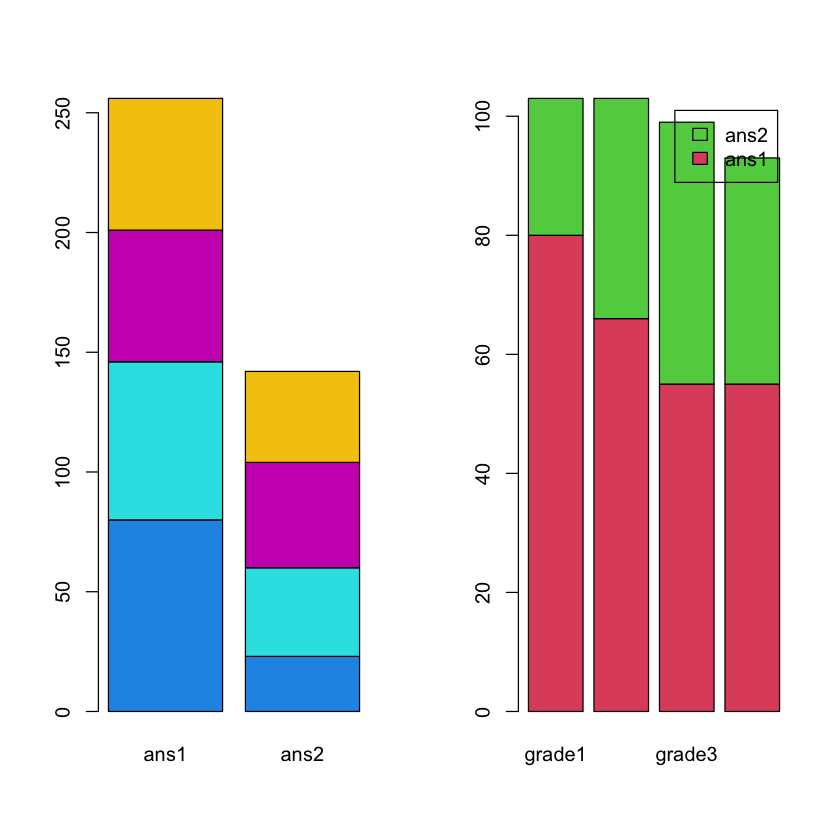

In [30]:
par(mfrow=c(1,2))
barplot(college, col=4:7)
barplot(t(college),legend=c('ans1','ans2'), col=2:3)

In [33]:
chisq.test(college)


	Pearson's Chi-squared test

data:  college
X-squared = 12.403, df = 3, p-value = 0.006123
